In [ ]:
# Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)

# Amaç -> Gözlemleri birbirine olan benzerliklerine göre alt kümelere ayırmaktır.

# Fark -> K-Means'ta küme oluşturmaya dışarıdan müdahale edemiyorduk, gözlemleme imkanı yoktu.

# Avantaj -> Bize belirli noktalardan çeşitli kümelenme seviyelerinden yeni kümelenmeleri görüntülüyor olmasıdır.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA
warnings.simplefilter(action="ignore", category=Warning)
df = pd.read_csv("USArrests.csv",index_col=0)

In [2]:
# Standartlaştırma
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df)

In [4]:
# Birleştirici
hc_average = linkage(df,"average") # Oklid uzaklığına göre birimleri kümeleri oluşturuyor.

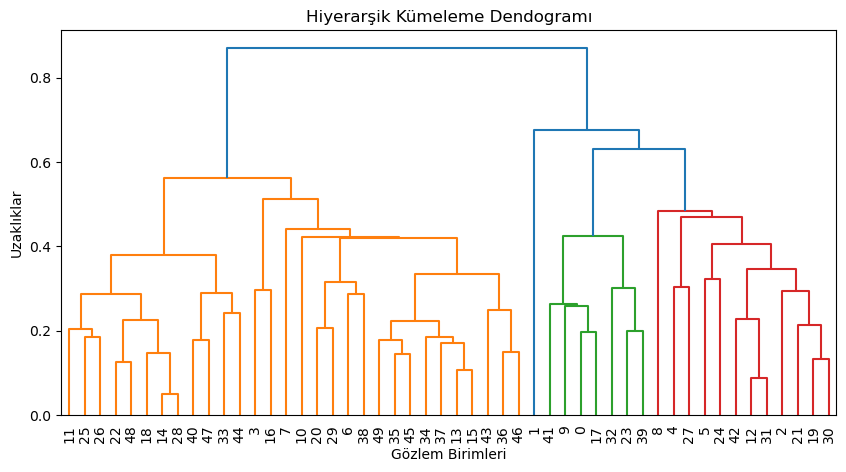

In [5]:
# Dendogram
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,leaf_font_size=10)
plt.show()

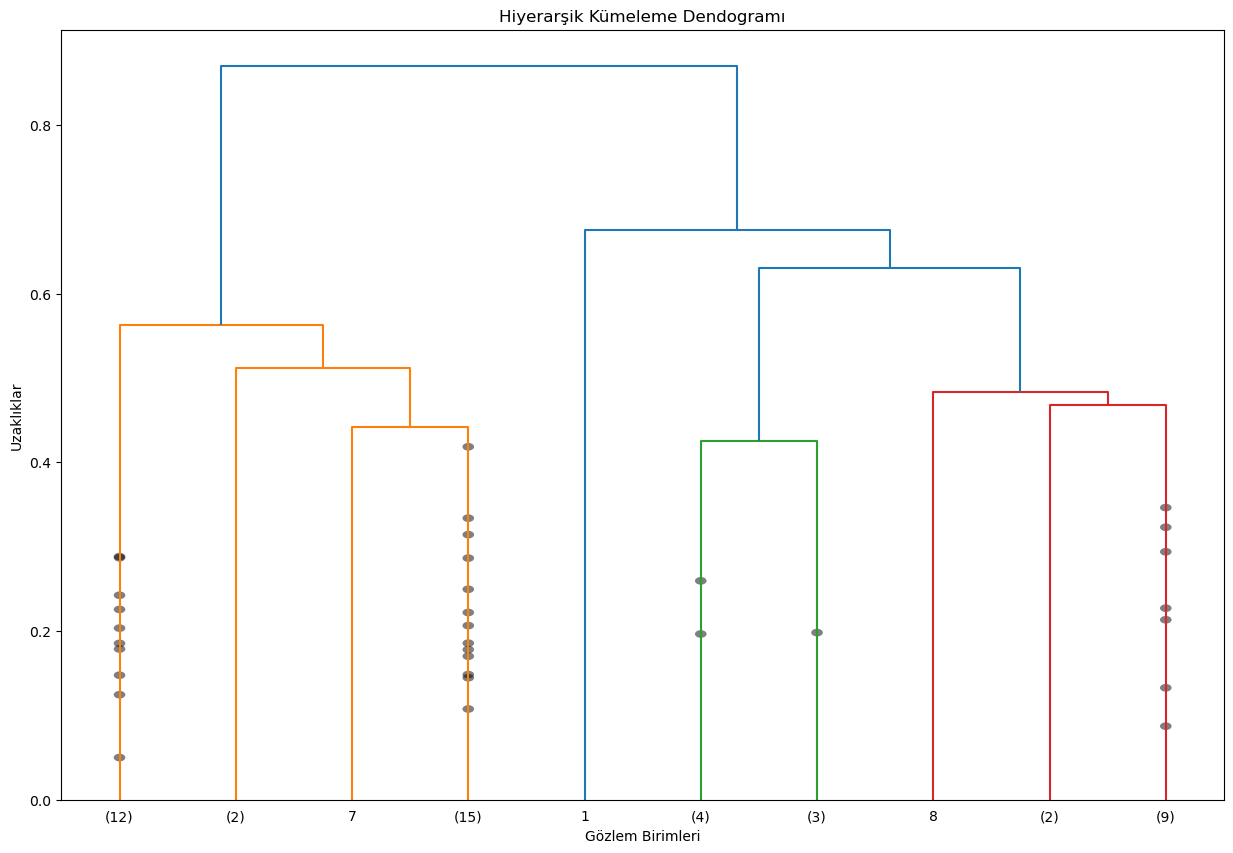

In [6]:
# Dendogram -> 10 Küme Halinde
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.show()

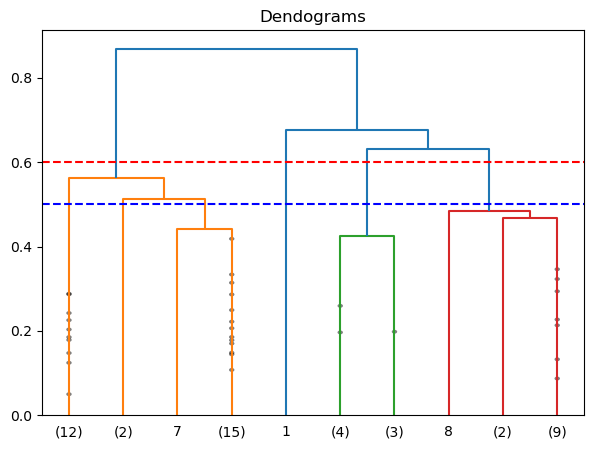

In [8]:
#######################
# Küme Sayısı Belirleme
#######################

plt.figure(figsize=(7,5))
plt.title("Dendograms")
dend = dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.axhline(y=.6, color="r", linestyle="--")
plt.axhline(y=.5, color="b", linestyle="--")
plt.show()

In [14]:
###################################
# Final Model Oluşturulması
###################################
# Küme sayısı 5 tane olsun dedik.

from sklearn.cluster import AgglomerativeClustering # Birleştirici Clustering Sınıfı

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

In [15]:
# Dataframe'e ait oldukları kümeleri ekledik.
df = pd.read_csv("USArrests.csv",index_col=0)

df["hi_cluster_no"] = clusters

df["hi_cluster_no"] = df["hi_cluster_no"] + 1 # 0 değeri olmasın diye 1 ekledik bu kadar.
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,5
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,4
Georgia,17.4,211,60,25.8,1
